In [82]:
# 1. First, load the dataset and do some basic EDA.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'diabetes'
table_name = 'diabetes'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

diabetes_df = pd.read_sql_query('select * from diabetes',con=engine)

engine.dispose()

In [8]:
diabetes_df.info()
diabetes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        763 non-null    int64  
 1   glucose            763 non-null    int64  
 2   blood_pressure     763 non-null    int64  
 3   skin_thickness     763 non-null    int64  
 4   insulin            763 non-null    int64  
 5   bmi                763 non-null    float64
 6   diabetes_pedigree  763 non-null    float64
 7   age                763 non-null    int64  
 8   outcome            763 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.8 KB


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,5,44,62,0,0,25.0,0.587,36,0
1,2,56,56,28,45,24.2,0.332,22,0
2,9,57,80,37,0,32.8,0.096,41,0
3,0,57,60,0,0,21.7,0.735,67,0
4,3,61,82,28,0,34.4,0.243,46,0


pregnancies          0.0
glucose              0.0
blood_pressure       0.0
skin_thickness       0.0
insulin              0.0
bmi                  0.0
diabetes_pedigree    0.0
age                  0.0
outcome              0.0
dtype: float64

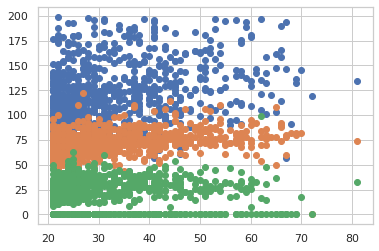

In [83]:
# 2. Detect the problems with the data, such as missing values and outliers. 
# Are there any nonsense values that you need to handle? For the missing values,
# think about which techniques would be the most suitable for handling these values. 
# Regarding the outliers, think about their potential effects on your analysis and 
# select an appropriate method to deal with them.

diabetes_df.isnull().sum() * 100 / diabetes_df.isnull().count()

# Data is all numeric in nature and any missing values are simply showing as zeroes.
# We can deal with the majority of columns but things like pregnancies and outcome 
# can very well be 0 so we will leave those alone for the time being.

plt.scatter(diabetes_df['age'], diabetes_df['glucose'])
plt.scatter(diabetes_df['age'], diabetes_df['blood_pressure'])
plt.scatter(diabetes_df['age'], diabetes_df['skin_thickness'])

# Was considering using interpolation to fill in the zeroes based off a grouped 
# age. However looking at age against the non-zero values, there is not a noticeable
# correlation. So for this assignment I am just going to fill in using the mean
# of the column.

diabetes_df["glucose"] = diabetes_df["glucose"].replace(0, np.nan)
diabetes_df["blood_pressure"] = diabetes_df["blood_pressure"].replace(0, np.nan)
diabetes_df["skin_thickness"] = diabetes_df["skin_thickness"].replace(0, np.nan)
diabetes_df["insulin"] = diabetes_df["insulin"].replace(0, np.nan)
diabetes_df["bmi"] = diabetes_df["bmi"].replace(0, np.nan)
diabetes_df["diabetes_pedigree"] = diabetes_df["diabetes_pedigree"].replace(0, np.nan)
diabetes_df["age"] = diabetes_df["age"].replace(0, np.nan)

diabetes_df["glucose"].fillna(diabetes_df["glucose"].mean(), inplace=True)
diabetes_df["blood_pressure"].fillna(diabetes_df["blood_pressure"].mean(), inplace=True)
diabetes_df["skin_thickness"].fillna(diabetes_df["skin_thickness"].mean(), inplace=True)
diabetes_df["insulin"].fillna(diabetes_df["insulin"].mean(), inplace=True)
diabetes_df["bmi"].fillna(diabetes_df["bmi"].mean(), inplace=True)
diabetes_df["diabetes_pedigree"].fillna(diabetes_df["diabetes_pedigree"].mean(), inplace=True)
diabetes_df["age"].fillna(diabetes_df["age"].mean(), inplace=True)

diabetes_df.isnull().sum() * 100 / diabetes_df.isnull().count()


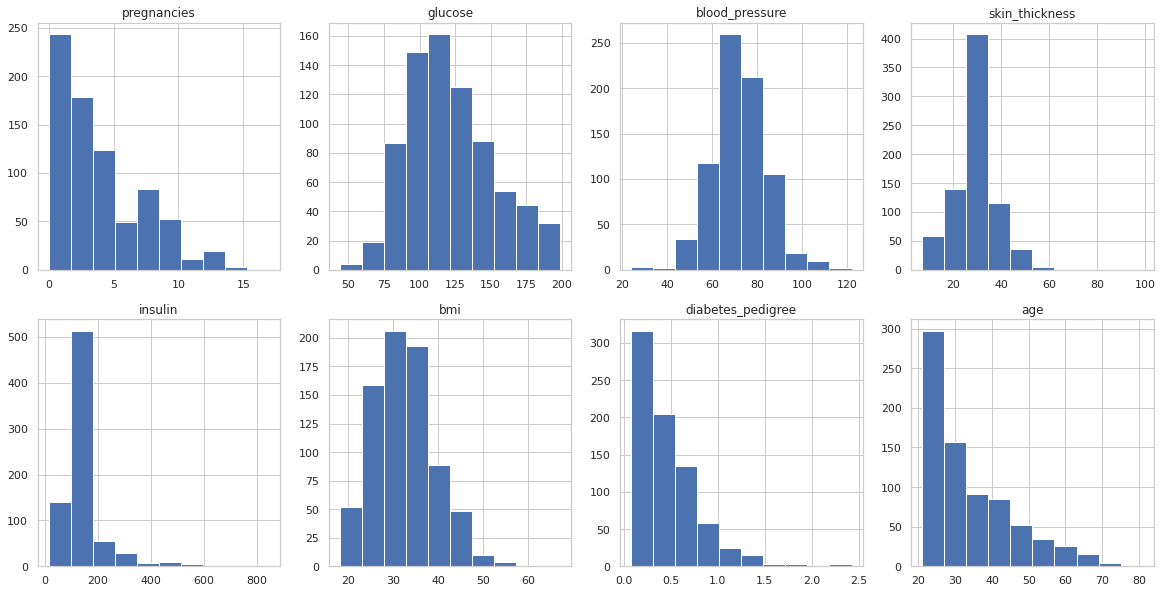

In [84]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
plt.hist(diabetes_df["pregnancies"])
plt.title('pregnancies')

plt.subplot(2, 4, 2)
plt.hist(diabetes_df["glucose"])
plt.title('glucose')

plt.subplot(2, 4, 3)
plt.hist(diabetes_df["blood_pressure"])
plt.title('blood_pressure')

plt.subplot(2, 4, 4)
plt.hist(diabetes_df["skin_thickness"])
plt.title('skin_thickness')

plt.subplot(2, 4, 5)
plt.hist(diabetes_df["insulin"])
plt.title('insulin')

plt.subplot(2, 4, 6)
plt.hist(diabetes_df["bmi"])
plt.title('bmi')

plt.subplot(2, 4, 7)
plt.hist(diabetes_df["diabetes_pedigree"])
plt.title('diabetes_pedigree')

plt.subplot(2, 4, 8)
plt.hist(diabetes_df["age"])
plt.title('age')

plt.show()


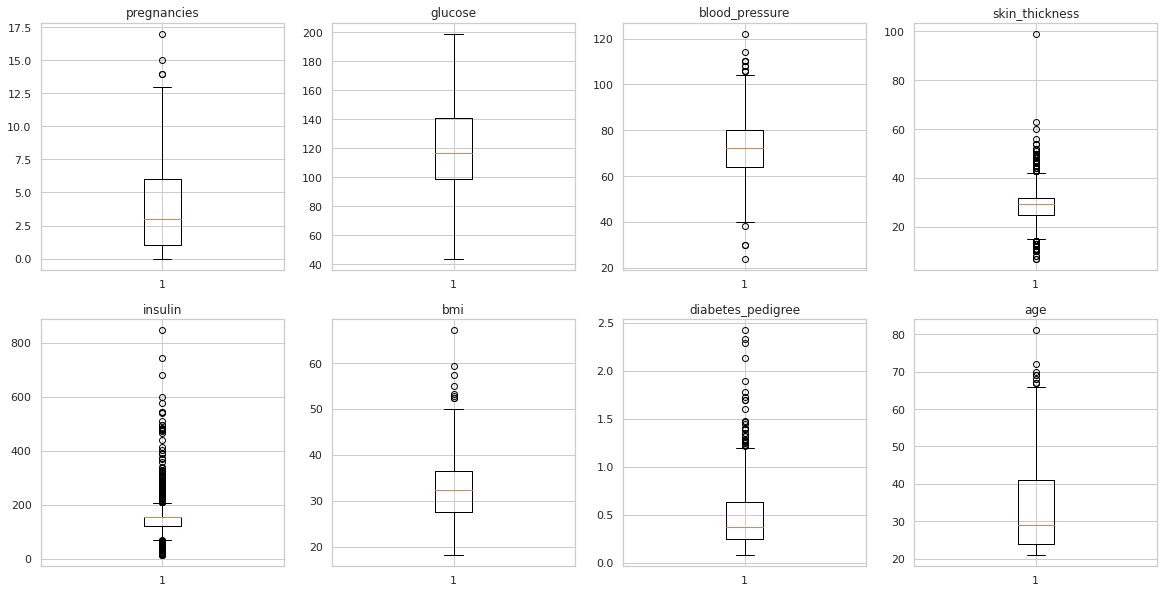

In [94]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
plt.boxplot(diabetes_df["pregnancies"])
plt.title('pregnancies')

plt.subplot(2, 4, 2)
plt.boxplot(diabetes_df["glucose"])
plt.title('glucose')

plt.subplot(2, 4, 3)
plt.boxplot(diabetes_df["blood_pressure"])
plt.title('blood_pressure')

plt.subplot(2, 4, 4)
plt.boxplot(diabetes_df["skin_thickness"])
plt.title('skin_thickness')

plt.subplot(2, 4, 5)
plt.boxplot(diabetes_df["insulin"])
plt.title('insulin')

plt.subplot(2, 4, 6)
plt.boxplot(diabetes_df["bmi"])
plt.title('bmi')

plt.subplot(2, 4, 7)
plt.boxplot(diabetes_df["diabetes_pedigree"])
plt.title('diabetes_pedigree')

plt.subplot(2, 4, 8)
plt.boxplot(diabetes_df["age"])
plt.title('age')

plt.show()

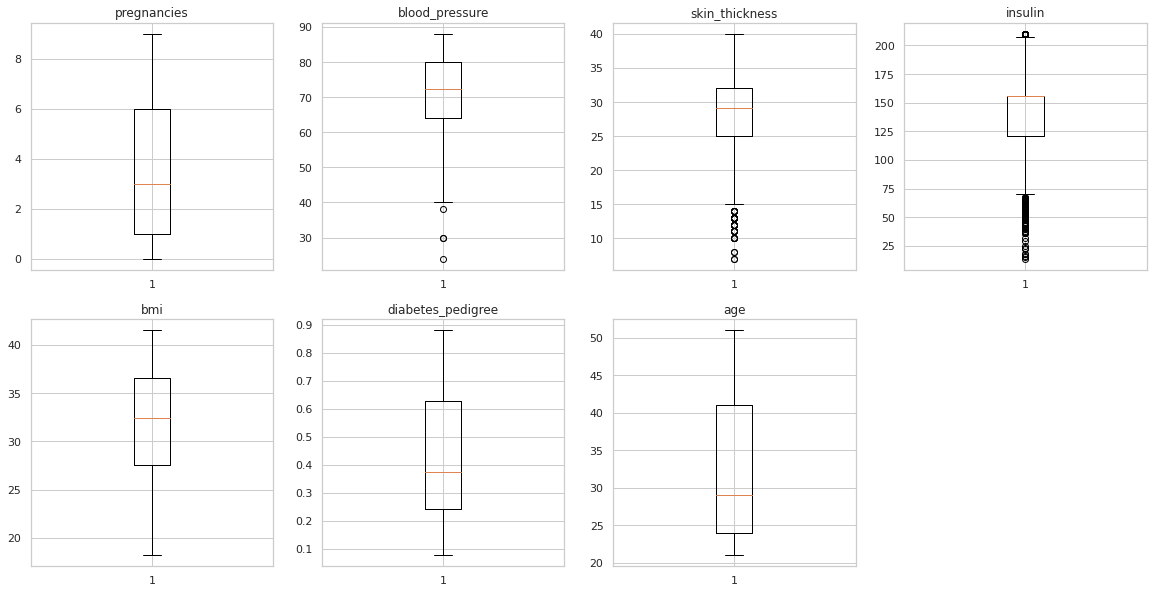

In [114]:
diabetes_df["pregnancies"] = winsorize(diabetes_df["pregnancies"], (0, 0.1))
diabetes_df["blood_pressure"] = winsorize(diabetes_df["blood_pressure"], (0, 0.1))
diabetes_df["skin_thickness"] = winsorize(diabetes_df["skin_thickness"], (0, 0.1))
diabetes_df["insulin"] = winsorize(diabetes_df["insulin"], (0, 0.1))
diabetes_df["bmi"] = winsorize(diabetes_df["bmi"], (0, 0.1))
diabetes_df["diabetes_pedigree"] = winsorize(diabetes_df["diabetes_pedigree"], (0, 0.1))
diabetes_df["age"] = winsorize(diabetes_df["age"], (0, 0.1))

plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
plt.boxplot(diabetes_df["pregnancies"])
plt.title('pregnancies')

plt.subplot(2, 4, 2)
plt.boxplot(diabetes_df["blood_pressure"])
plt.title('blood_pressure')

plt.subplot(2, 4, 3)
plt.boxplot(diabetes_df["skin_thickness"])
plt.title('skin_thickness')

plt.subplot(2, 4, 4)
plt.boxplot(diabetes_df["insulin"])
plt.title('insulin')

plt.subplot(2, 4, 5)
plt.boxplot(diabetes_df["bmi"])
plt.title('bmi')

plt.subplot(2, 4, 6)
plt.boxplot(diabetes_df["diabetes_pedigree"])
plt.title('diabetes_pedigree')

plt.subplot(2, 4, 7)
plt.boxplot(diabetes_df["age"])
plt.title('age')

plt.show()

# This generally gets rid of most outliers. The data is very skewed so I am electing not go
# too far in the way of removing data that appears as outliers beyond basic winzorization.

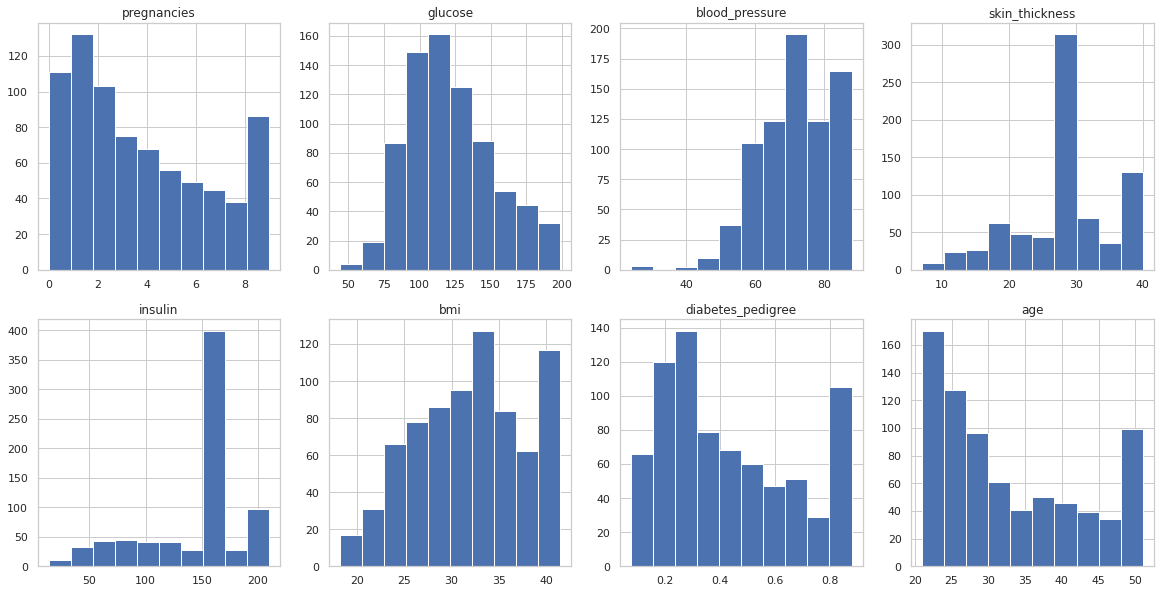

In [115]:
# 3. Explore the data using univariate and multivariate exploration techniques.
# Be sure to pay special attention to your target variable. In this regard, focus 
# on finding the relevant variables that may affect the likelihood of having diabetes.
diabetes_df.corr()

plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
plt.hist(diabetes_df['pregnancies'])
plt.title('pregnancies')

plt.subplot(2, 4, 2)
plt.hist(diabetes_df['glucose'])
plt.title('glucose')

plt.subplot(2, 4, 3)
plt.hist(diabetes_df['blood_pressure'])
plt.title('blood_pressure')

plt.subplot(2, 4, 4)
plt.hist(diabetes_df['skin_thickness'])
plt.title('skin_thickness')

plt.subplot(2, 4, 5)
plt.hist(diabetes_df['insulin'])
plt.title('insulin')

plt.subplot(2, 4, 6)
plt.hist(diabetes_df['bmi'])
plt.title('bmi')

plt.subplot(2, 4, 7)
plt.hist(diabetes_df['diabetes_pedigree'])
plt.title('diabetes_pedigree')

plt.subplot(2, 4, 8)
plt.hist(diabetes_df['age'])
plt.title('age')

plt.show()

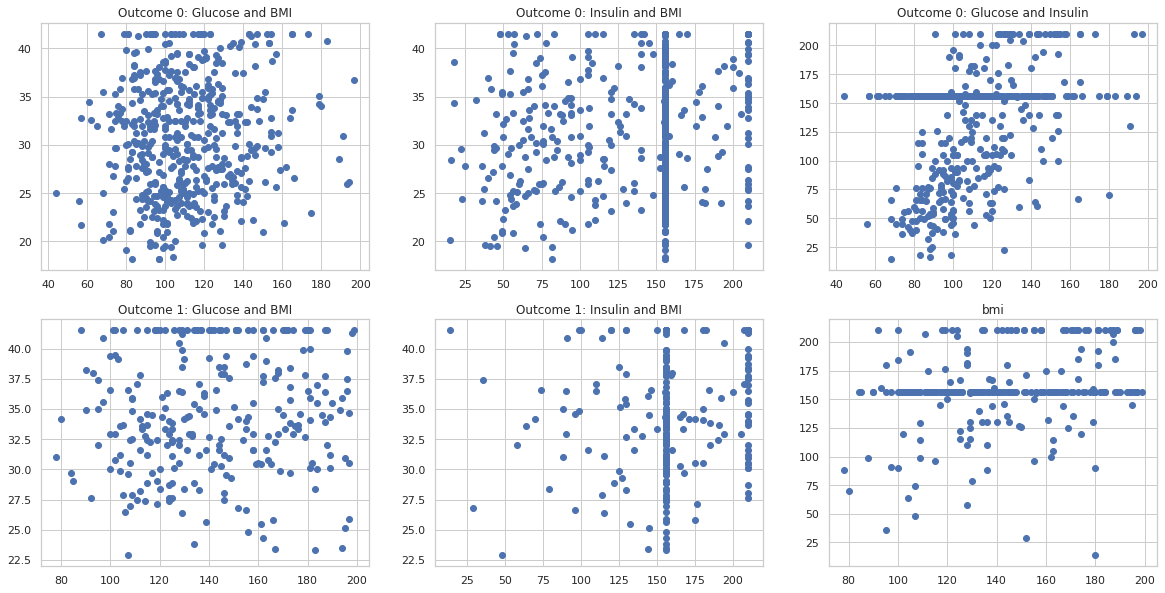

In [119]:
diabetes_df.corr()

# Glucose has the highest correlation with the outcome, followed by bmi, age, and insulin

outcome_z = diabetes_df[diabetes_df['outcome'] == 0]
outcome_o = diabetes_df[diabetes_df['outcome'] == 1]

plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
plt.scatter(outcome_z['glucose'], outcome_z['bmi'])
plt.title('Outcome 0: Glucose and BMI')

plt.subplot(2, 3, 2)
plt.scatter(outcome_z['insulin'], outcome_z['bmi'])
plt.title('Outcome 0: Insulin and BMI')

plt.subplot(2, 3, 3)
plt.scatter(outcome_z['glucose'], outcome_z['insulin'])
plt.title('Outcome 0: Glucose and Insulin')

plt.subplot(2, 3, 4)
plt.scatter(outcome_o['glucose'], outcome_o['bmi'])
plt.title('Outcome 1: Glucose and BMI')

plt.subplot(2, 3, 5)
plt.scatter(outcome_o['insulin'], outcome_o['bmi'])
plt.title('Outcome 1: Insulin and BMI')

plt.subplot(2, 3, 6)
plt.scatter(outcome_o['glucose'], outcome_o['insulin'])
plt.title('Outcome 1: Glucose and Insulin')
plt.title('bmi')

plt.show()

# Appears some errors may have been made at some point. Moving on though, the distribution of 
# these predictors for both outcomes seem someone proportional to one another. Outcome 0 does
# have a slightly clearer correlation between glucose and insulin levels.

Eigenvector 1: 
[0.30328886 0.39698825 0.3165719  0.3307805  0.33184589 0.3373982
 0.11424881 0.38076135 0.39848645]
Eigenvalue 1: 2.7720996871724024
----------------------------------------
Eigenvector 2: 
[ 0.55335439 -0.07736012  0.10886006 -0.36718932 -0.04635468 -0.48285038
 -0.22367126  0.49774218 -0.08981355]
Eigenvalue 2: 1.4376069283846995
----------------------------------------
Eigenvector 3: 
[ 0.14804591 -0.42191966  0.34078678  0.45086408 -0.2786008   0.33336355
 -0.40507657  0.08047042 -0.34833891]
Eigenvalue 3: 1.1246336346542416
----------------------------------------
Eigenvector 4: 
[ 0.61701148  0.18221986  0.16610172  0.06469001 -0.01297022 -0.10824973
  0.0702067  -0.73100543 -0.05598239]
Eigenvalue 4: 0.35600441983441367
----------------------------------------
Eigenvector 5: 
[-0.18852874 -0.18452671  0.17319352  0.56562461  0.01351861 -0.69176715
  0.04304343 -0.03345497  0.31429778]
Eigenvalue 5: 0.39784869336638723
----------------------------------------
Eig

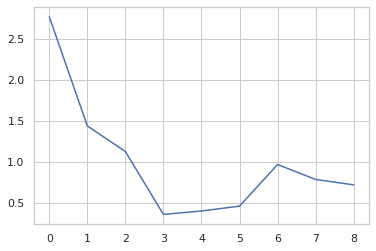

[2.77209969 1.43760693 1.12463363 0.35600442 0.39784869 0.45724298
 0.96587736 0.78338362 0.71711371]
The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.30760739 0.15952475 0.12479552 0.10717905 0.08692854]


In [125]:
# 4. In the feature-engineering step, you need to select a suite of variables that you 
# think would be ideal in the modeling phase. More concretely, you may discard some variables 
# that are highly correlated with the other ones or the variables that you think are irrelevant 
# for predicting whether a patient has diabetes.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# pca

X = StandardScaler().fit_transform(diabetes_df)
Xt = X.T
Cx = np.cov(Xt)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The proportion of total variance in the dataset explained by each',
    'component calculated by hand\n',
    eig_val_cov / sum(eig_val_cov)
)

plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform `X` into `Y`.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

In [ ]:
# 5. Summarize your findings. One of the most important skills of a data scientist 
# is to convey ideas and findings to nontechnical people using understandable language. 
# In this regard, one of the most effective ways to communicate your ideas is to do it 
# using effective visualization.

# Hard to say given ay potential mistakes made at some point in the process. To take
# a swing at giving some kind of finding. People with low insulin but higher glucose counts
# seem more prone to diabetes.